<a href="https://colab.research.google.com/github/nishunotam/mini-project/blob/main/TaxiFare_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving TaxiFare (3).csv to TaxiFare (3).csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("Libraries Import Successfully")

Libraries Import Successfully


In [3]:
datatype={"unique_id" : "object","amount" : "float64","date_time_of_pickup" : "object",
          "longitude_of_pickup" : "float64","latitude_of_pickup" : "float64","longitude_of_dropoff" : "float64",
          "latitude_of_dropoff" : "float64","no_of_passenger" : "int64"
         }

df=pd.read_csv("TaxiFare (3).csv", low_memory=False, nrows=10**5,dtype=datatype,parse_dates=["date_time_of_pickup"])
df.drop(["unique_id"],axis=1,inplace=True)

df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
##printing shape of dataset
print("Shape of Dataset : ",df.shape)

Shape of Dataset :  (50000, 7)


## Data Dictionary

1.date_time_of_pickup : Timestamp value indicating when the taxi ride started.    
2.longitude_of_pickup : Longitude coordinate of where the taxi ride started.       
3.latitude_of_pickup : Lattitude coordinate of where the taxi ride started.      
4.longitude_of_dropoff : Longitude coordinate of where the taxi ride ended.      
5.latitude_of_dropoff : Lattitude coordinate of where the taxi ride ended.       
6.no_of_passenger : Indicating the number of passengers in the taxi ride.        

## Target                                                                           
1.amount : Dollar amount of the cost of the taxi ride

In [6]:
#Creating datetime features based on date_time_pickup
import calendar

df['date_pickup']=df['date_time_of_pickup'].dt.date
df['day_pickup']=df['date_time_of_pickup'].apply(lambda x:x.day)
df['hour_pickup']=df['date_time_of_pickup'].apply(lambda x:x.hour)
df['day_week_of_pickup']=df['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df['month_pickup']=df['date_time_of_pickup'].apply(lambda x:x.month)
df['year_pickup']=df['date_time_of_pickup'].apply(lambda x:x.year)

df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_pickup,day_pickup,hour_pickup,day_week_of_pickup,month_pickup,year_pickup
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [7]:
#Describing Data
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_pickup,hour_pickup,month_pickup,year_pickup
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


## Summary                                                                                
Minimum fare amount is negative                                                  
Minimum and Maximum longitude and latitude look unreal should be between -74 and 41                                                                             
Minimum passenger count is 0¶


In [9]:
#Removing outlier value
df=df[((df['longitude_of_pickup'] > -78) &
      (df['longitude_of_pickup'] < -70)) &
     ((df['longitude_of_dropoff'] > -78) &
     (df['longitude_of_dropoff'] < -70)) &
     ((df['latitude_of_pickup'] > 37) &
     (df['latitude_of_pickup'] < 45)) &
      ((df['latitude_of_dropoff'] > 37) &
      (df['latitude_of_dropoff'] < 45)) &
      (df['no_of_passenger'] > 0) &
      (df['amount'] >= 2.5)]

In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_pickup,hour_pickup,month_pickup,year_pickup
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.664139,13.482757,6.276233,2011.739770
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659466,6.504260,3.461211,1.867738
min,2.500000,-75.423848,38.754215,-75.354559,39.604971,1.00000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000


In [11]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
date_pickup             0
day_pickup              0
hour_pickup             0
day_week_of_pickup      0
month_pickup            0
year_pickup             0
dtype: int64

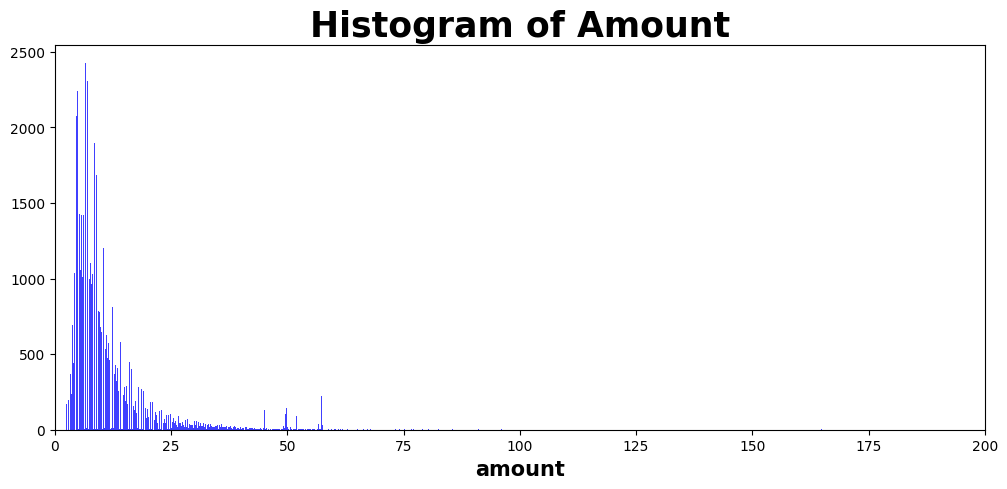

In [12]:
#Visualising Target Variable
plt.figure(figsize = (12, 5))
n, bins, patches = plt.hist(df.amount, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('amount',fontsize=15,fontweight='bold')
plt.title('Histogram of Amount',fontsize=25,fontweight='bold')
plt.xlim(0, 200)
plt.show();

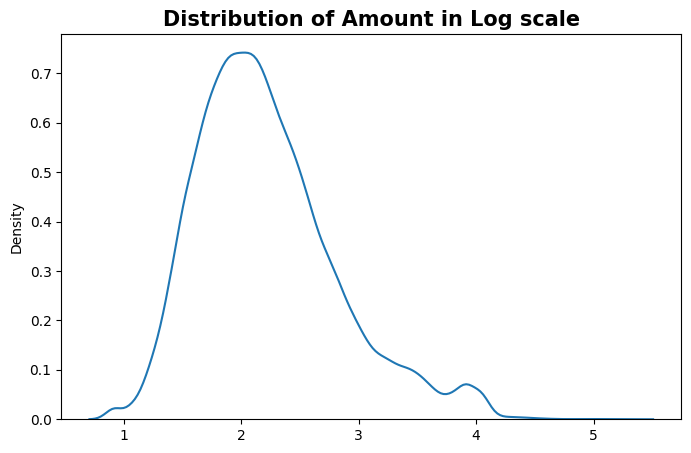

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['amount'].values)).set_title(
"Distribution of Amount in Log scale",fontsize=15,fontweight='bold');

In [14]:
#Analysing top 5 amount
df['amount'].value_counts(normalize=True).iloc[:5]

6.5    0.049423
4.5    0.042190
8.5    0.038563
5.3    0.028810
6.1    0.028769
Name: amount, dtype: float64

Text(0, 0.5, 'Count')

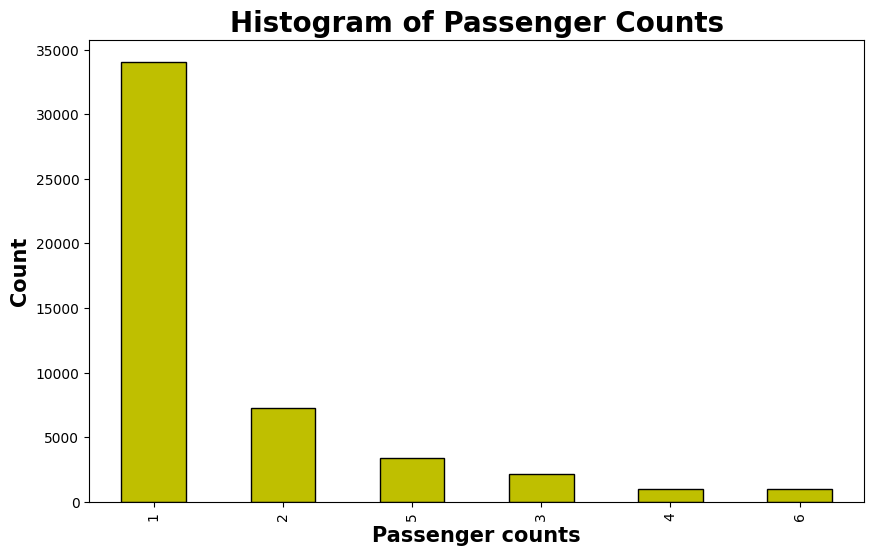

In [15]:
#passenger count
plt.figure(figsize=(10,6))
df['no_of_passenger'].value_counts().plot.bar(color = 'y', edgecolor = 'k');
plt.title('Histogram of Passenger Counts',fontsize=20,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

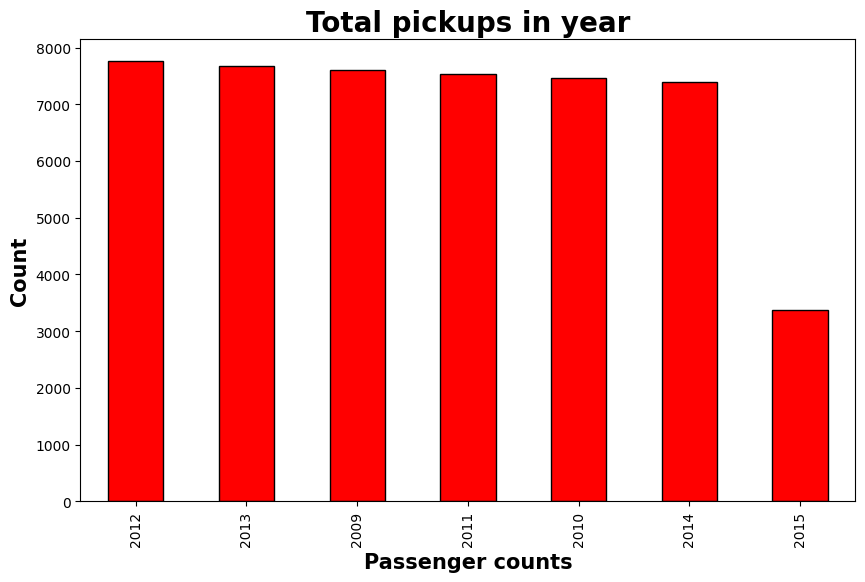

In [16]:
plt.figure(figsize=(10,6))
df['year_pickup'].value_counts().plot.bar(color = 'r', edgecolor = 'k');
plt.title('Total pickups in year',fontsize=20,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

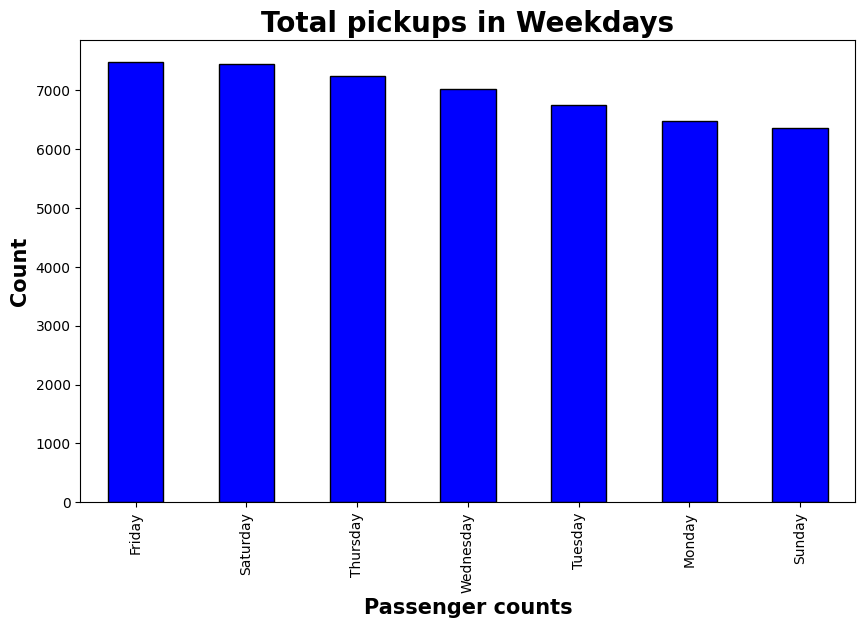

In [17]:
plt.figure(figsize=(10,6))
df['day_week_of_pickup'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Total pickups in Weekdays',fontsize=20,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

In [18]:
#Analysing Number of passengers
df['no_of_passenger'].value_counts()

1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: no_of_passenger, dtype: int64

(-74.03, -73.75)

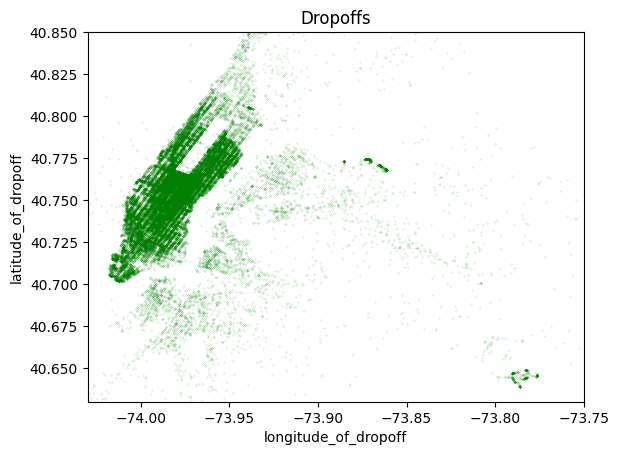

In [19]:
#plot Heatmap of pictures and dropoffs within New York
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

df.plot(kind='scatter', x='longitude_of_dropoff',y='latitude_of_dropoff',color='green',s=.02,alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

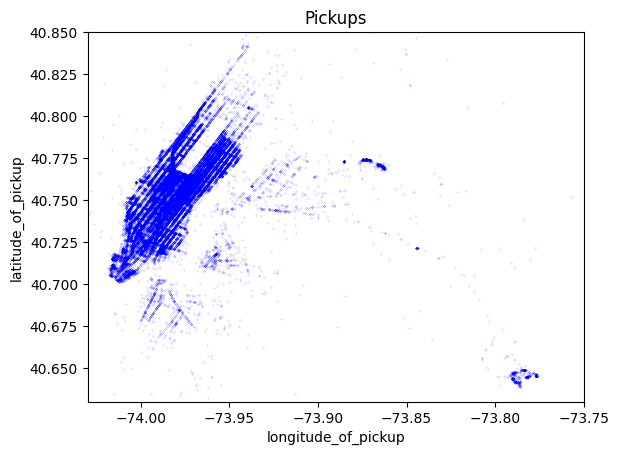

In [20]:
df.plot(kind='scatter', x='longitude_of_pickup',y='latitude_of_pickup',color='blue',s=.02,alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

## Distance between two Geolocations

In [21]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 #pi/180
    a = 0.5 - np.cos((lat2 - lat1) *p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

#add new column to dataframe with distance in miles
df['distance miles'] = distance(df.latitude_of_pickup,df.longitude_of_pickup,df.latitude_of_dropoff,df.longitude_of_dropoff)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_pickup,day_pickup,hour_pickup,day_week_of_pickup,month_pickup,year_pickup,distance miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


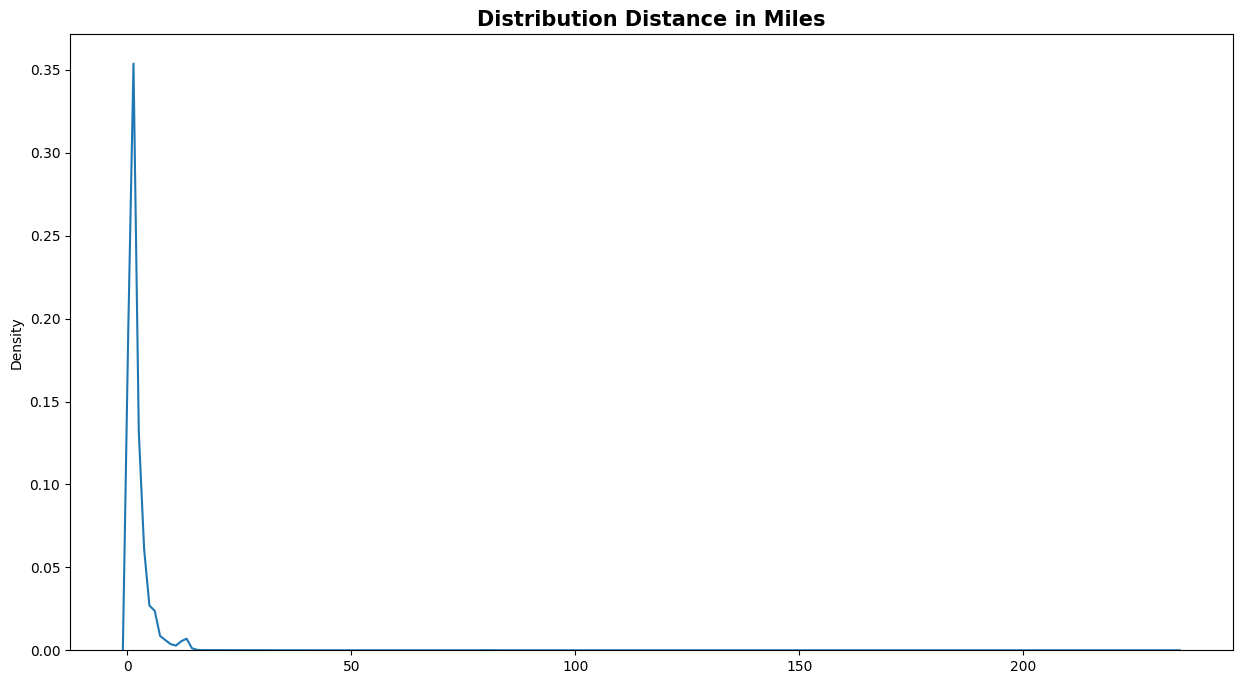

In [22]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['distance miles'].values).set_title("Distribution Distance in Miles",fontsize=15,fontweight='bold');

In [23]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
#pickup location for train dataset
import folium
Pickup_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)
for each in df[:500].iterrows():
    folium.CircleMarker([each[1]['latitude_of_pickup'],each[1]['longitude_of_pickup']],
                       radius=3,
                       color='blue',
                       popup=str(each[1]['latitude_of_pickup'])+','+str(each[1]['longitude_of_pickup']),
                       fill_color='#FD8A6C'
                       ).add_to(Pickup_Locations)
Pickup_Locations

In [25]:
#Drop-off location for train dataset
import folium
Drop_off_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)
for each in df[:500].iterrows():
    folium.CircleMarker([each[1]['latitude_of_dropoff'],each[1]['longitude_of_dropoff']],
                       radius=3,
                       color='red',
                       popup=str(each[1]['latitude_of_dropoff'])+','+str(each[1]['longitude_of_dropoff']),
                       fill_color='#FD8A6C'
                       ).add_to(Drop_off_Locations)
Drop_off_Locations

In [26]:
df_final=df.copy()
df_final.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_pickup,day_pickup,hour_pickup,day_week_of_pickup,month_pickup,year_pickup,distance miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [27]:
#Imputing Categorical Variables
Variables={'Monday' : 1 , 'Tuesday' : 2 , 'Thursday' : 3 , 'Saturday' : 4 , 'Wednesday' : 5,
          'Sunday' : 6 , 'Friday' : 7 }
year={2012: 1 ,2013 :2, 2011: 3, 2009: 4, 2010: 5, 2014: 6, 2015:7}
df_final['year_pickup']=df_final['year_pickup'].map(year)
df_final['day_week_of_pickup']=df_final['day_week_of_pickup'].map(Variables)
df_final.drop(['date_time_of_pickup','date_pickup'],axis=1,inplace=True)
df_final.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_pickup,hour_pickup,day_week_of_pickup,month_pickup,year_pickup,distance miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


In [28]:
from sklearn.model_selection import train_test_split

X=df_final.drop(['amount'],axis=1)
y=df_final[['amount']]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [29]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (34162, 11)
Shape of X_test :  (14641, 11)
Shape of y_train :  (34162, 1)
Shape of y_test :  (14641, 1)


## Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print("TEST RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

TEST RMSE: 8.530


## Random Forest Regression¶

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5,random_state=0,n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("TEST RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

TEST RMSE: 4.684


In [32]:
import pickle

# save the trained model as a pickle string.

pickle.dump(rf,open('rf','wb'))

## Final Application

In [33]:
import folium
Enter_Coordinates = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)
popup = folium.LatLngPopup()
popup=folium.ClickForMarker()

Enter_Coordinates.add_child(popup)

Enter_Coordinates

In [34]:
Pickup_Finder = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)
Pickup=[40.744075,-74.003197]
Drop_off=[40.7616,-73.9734]
points=[]
for i in range(len(Pickup)):
    points.append([Pickup[i],Drop_off[i]])
print("Distance Between Pickup and Dropp-off in Miles : ",distance(Pickup[0],Pickup[1],Drop_off[0],Drop_off[1]))

folium.CircleMarker(Pickup,radius=5,color='blue',popup=str([Pickup[0],Pickup[1]]),
                   fill_color='#FD8A6C').add_to(Pickup_Finder)

folium.CircleMarker(Drop_off,radius=5,color='red',popup=str([Drop_off[0],Drop_off[1]]),
                   fill_color='#FD8A6C').add_to(Pickup_Finder)


for index,lat in enumerate(Pickup):
    folium.Marker([lat,
                   Drop_off[index]],
                 icon = folium.Icon(ccolor='green',icon='plus')).add_to(Pickup_Finder)

folium.PolyLine([Pickup, Drop_off], color='green',weight=3,opacity=5).add_to(Pickup_Finder)


Pickup_Finder

Distance Between Pickup and Dropp-off in Miles :  1.9744617137237859


In [35]:
print("Enter Your Information to Predict Fare : ")

Pickup_Coordinates=str(input("Enter Pickup Coordinates : "))
Drop_Off_Coordinates=str(input("Enter Drop-Off Coordinates : "))

latitude_of_pickup = float(Pickup_Coordinates.split(',')[0])
longitude_of_pickup =  float(Pickup_Coordinates.split(',')[1])

latitude_of_dropoff = float(Drop_Off_Coordinates.split(',')[0])
longitude_of_dropoff =  float(Drop_Off_Coordinates.split(',')[1])

Enter_Date=input("Enter Date (DD/MM/YEAR)")

no_of_passenger = int(input("Enter Number of Passengers: "))

day_pickup = int(Enter_Date.split('/')[0])
hour_pickup = int(input("Enter Hour: "))

day_week_of_pickup = int(input('Enter Week: '))

month_pickup = int(Enter_Date.split('/')[1])
year_pickup = int(Enter_Date.split('/')[2])

distancemiles = distance(latitude_of_pickup,longitude_of_pickup,latitude_of_dropoff,longitude_of_dropoff)

my_array=np.array([longitude_of_pickup, latitude_of_pickup, longitude_of_dropoff,
                   latitude_of_dropoff,no_of_passenger,day_pickup,hour_pickup,
                   day_week_of_pickup,month_pickup,year_pickup,distancemiles])

print('Fare Amount ($) : ',rf.predict(my_array.reshape(1,-1)))

Enter Your Information to Predict Fare : 
Enter Pickup Coordinates : 78.98,76.987
Enter Drop-Off Coordinates : 56.78,98.78
Enter Date (DD/MM/YEAR)11/12/2015
Enter Number of Passengers: 6
Enter Hour: 5
Enter Week: 4
Fare Amount ($) :  [25.12030738]
